## My First Bing Visual Search 

This notebook is inspired on the tutorial [Your first Bing Visual Search query in Python](https://docs.microsoft.com/en-us/azure/cognitive-services/bing-visual-search/quickstarts/python)

** Setting the subscription key to API key for the Bing API service.** <br/> You can get a 7-day trial key [here](https://azure.microsoft.com/en-us/try/cognitive-services/?apiSlug=search-api-v7&unauthorized=1).

In [1]:
with open('keys.txt') as f:
    lines = f.readlines()

In [2]:
subscription_key = lines[1]
assert subscription_key

** Defining the endpoint. **

In [3]:
search_url = "https://api.cognitive.microsoft.com/bing/v7.0/images/visualsearch"

** Defining the path of the image to upload. ** 

In [4]:
imagePath = "C:/Git/VisualSearch/data/cat.jpg"

In [5]:
file = {'image' : open(imagePath, 'rb') }

** Calling out to the Bing search APIs and returning the results as a JSON object. **

In [6]:
import requests

# pass in the API key via the headers dictionary
headers = {"Ocp-Apim-Subscription-Key" : subscription_key}

response = requests.post( search_url, headers = headers, files = file )
print(response.url)

response.raise_for_status()

# contains the actual images along with rich metadata such as related items
search_results = response.json()

https://api.cognitive.microsoft.com/bing/v7.0/images/visualsearch


In [7]:
# import utils as ut
# ut.print_json(search_results)

** Extracting the thumbnail URLS for all results. **

In [8]:
image_urls = []
all_urls = search_results['tags'][0]['actions'][2]['data']['value']
for url in all_urls:
    image_urls.append(url['thumbnailUrl'])

In [13]:
print( "Total of images found:", len(image_urls) )

Total of images found: 35


**Rendering the input image.**

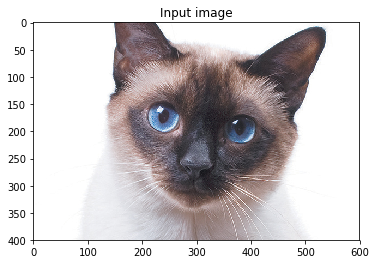

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

# Input image
import matplotlib.image as mpimg
image = mpimg.imread(imagePath)
plt.title('Input image')
plt.imshow(image)
plt.show()

**Downloading the thumbnail of the images that we find and rendering them on a $m \times n$ grid. **

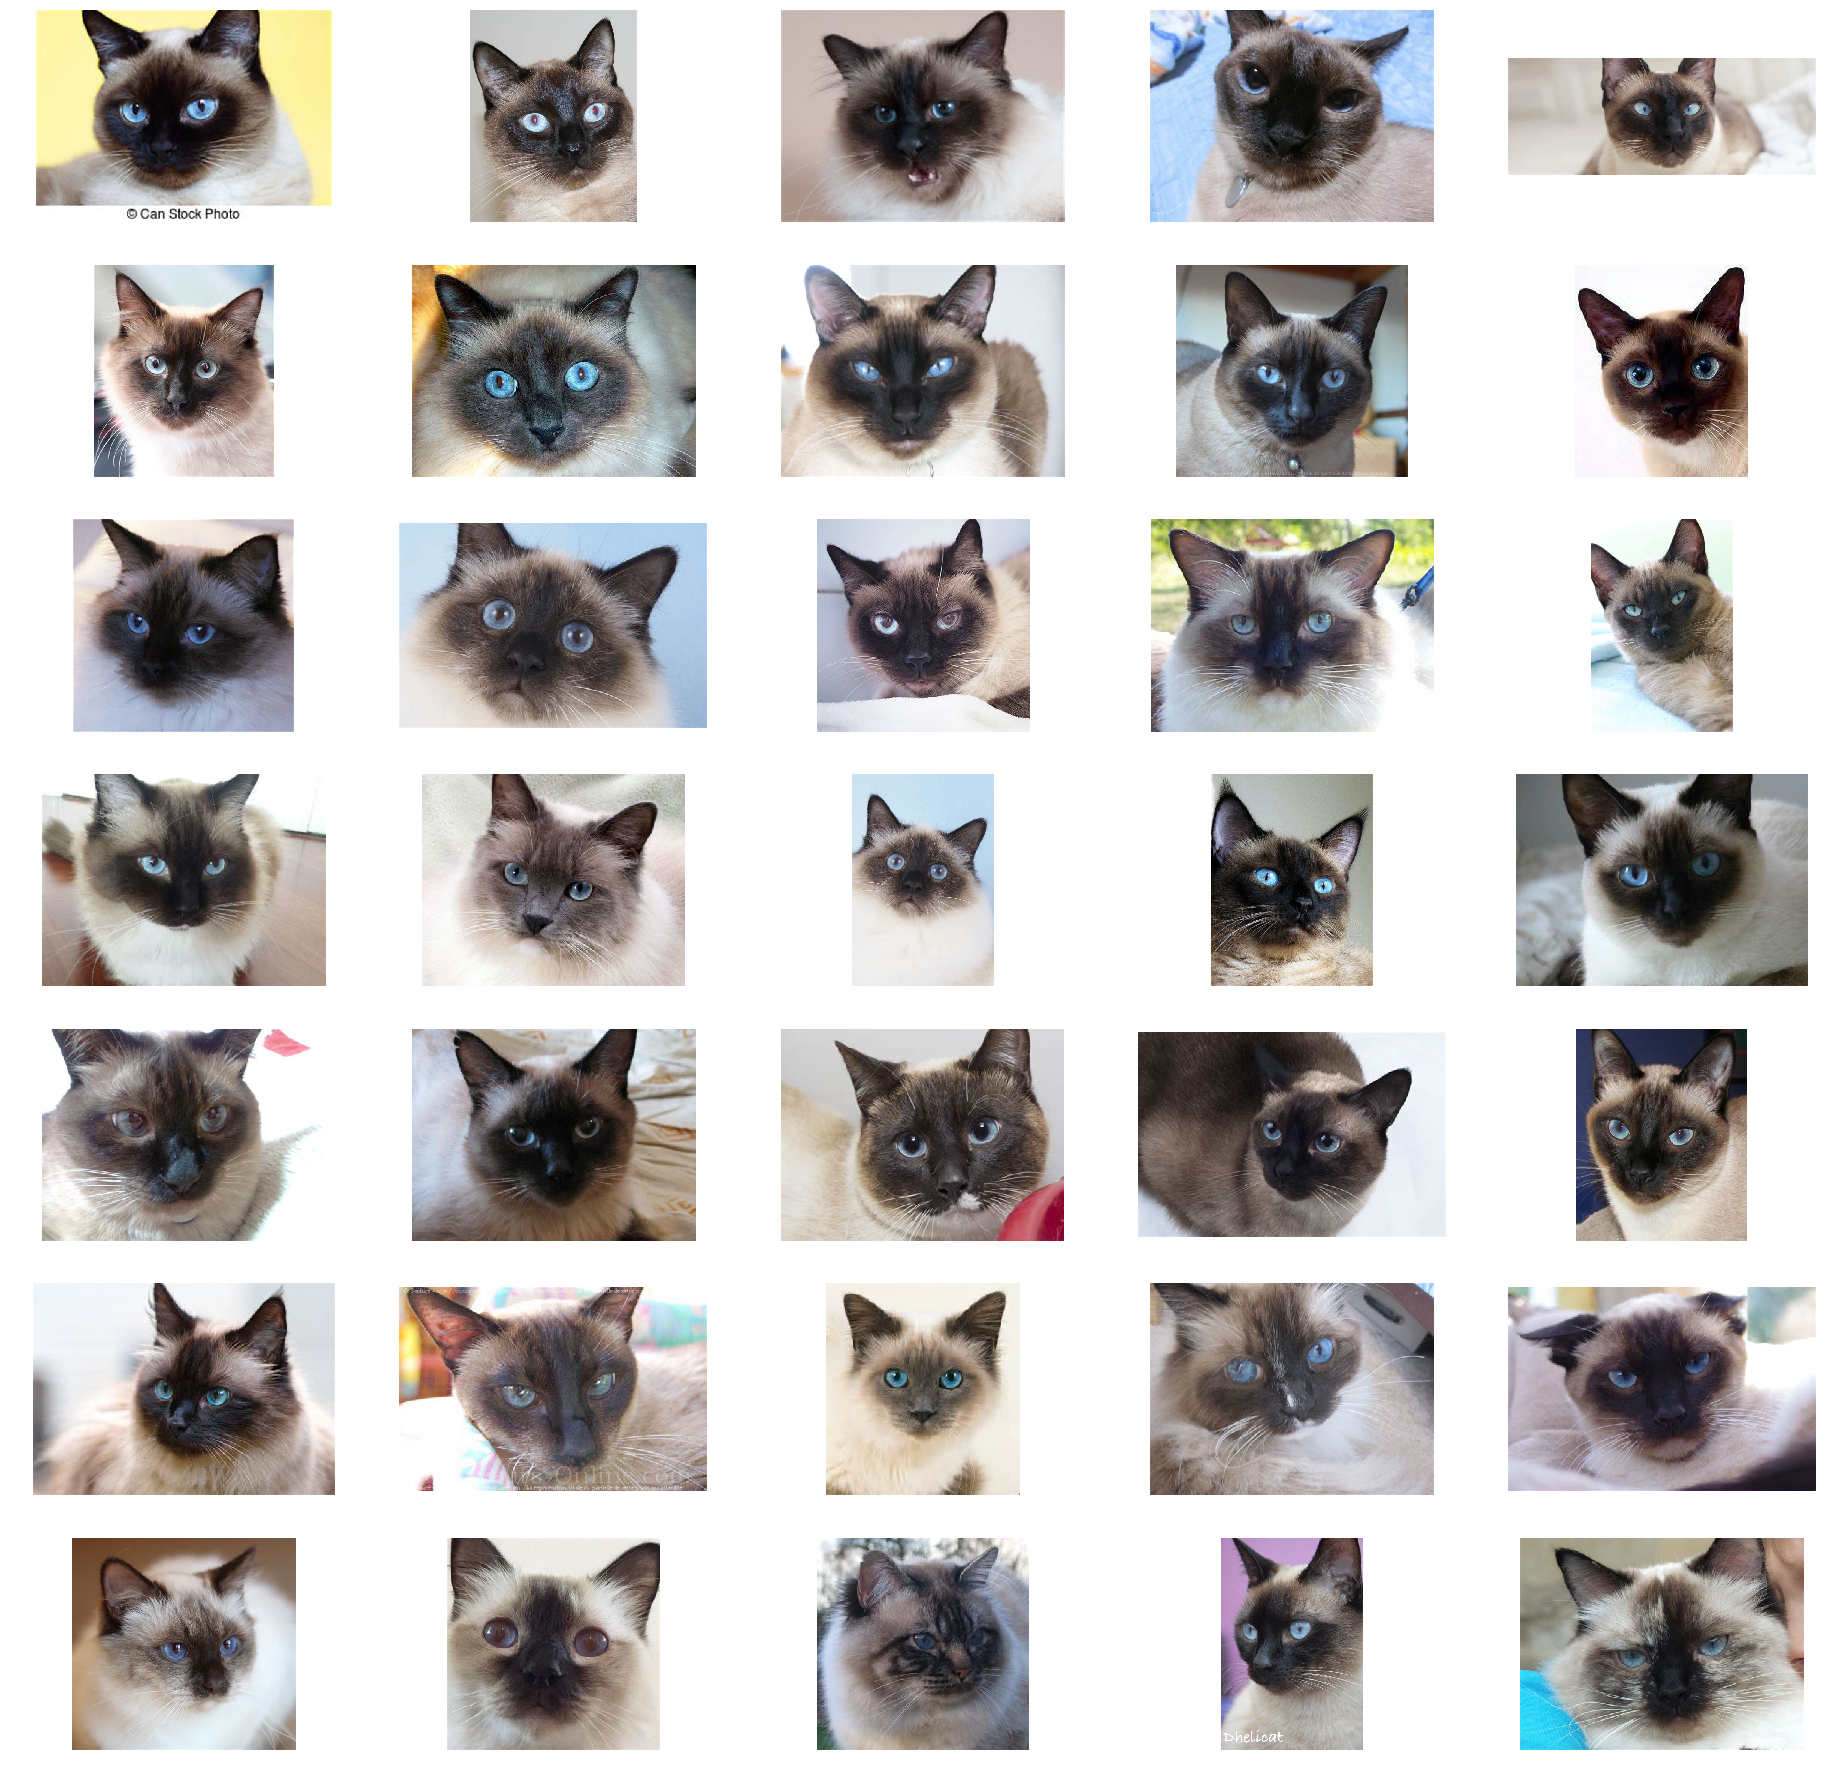

In [11]:
m = 7
n = 5
f, axes = plt.subplots(m, n, figsize=(32,32))
for i in range(m):
    for j in range(n):
        indice = i * n + j 
        if indice < len(image_urls):
            image_data = requests.get( image_urls[ indice ] )
            image_data.raise_for_status()
            image = Image.open( BytesIO( image_data.content ) )        
            axes[i][j].imshow( image )
            axes[i][j].axis( "off" )

Sources:  
* [What is Bing Visual Search API?](https://docs.microsoft.com/en-us/azure/cognitive-services/bing-visual-search/overview#the-request)